# 🏥 **1. Introduction**





According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# **Attribute Information**

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# **The outline for the project is as follows:**

Import Libraries & Dataset

Read the data as a data frame

Perform basic EDA which should include the following and print out your insights at every step

Check the presence of missing values

Data type of each attribute

Description of percent of data object columns

Data Preprocessing for Model

Summary of Statistics

SKEWNESS,distplot,countplot,boxplot,pairplot

Model Building

Supervised Machine Learning Algorithm
Logistic Regression, DecisionTree,Ensemble Technique,KNN,Naive Base,SVM

Model Comparison



# **📝 2. Exploratory data analysis**

# **Step 1: Import the necessary libraries**

In [ ]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.express as px #visualization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# **Read the data as a data frame**

In [ ]:
stroke = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
pd.set_option('max_rows',None)

In [ ]:
# Display the top 5 Rows of the data set
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Using the head function, we observe that there are 11 fields available to determine a patient's likelihood of stroke. These fields are id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, and smoking_status. Because the id field is likely a patient identifier, we can assume it does not relate to the possibility of stroke and can thus drop the field.

In [ ]:
# Display the Bottom 5 Rows of the data set
stroke.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
stroke.stroke.value_counts() 


0    4861
1     249
Name: stroke, dtype: int64

We observed that 0 define Patients has not stroke disease
1 Define Patients has stroke disease the data sets is imbalanced

# **Perform basic EDA which should include the following and print out your insights at every step**

In [ ]:
#Shape of the data
stroke.shape

(5110, 12)

# **Checking the presence of missing values**

In [ ]:
# Print the percentage of missing values
stroke.isna().sum()/len(stroke.index)*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

We Observed that only 3.93% approx missing value is present in BMI and rest others no missing valus is presnt

# **Data type of each attribute**

In [ ]:
stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

We observed that 5 attributes are in **object** or 4 attributes are in **int** and 3 attributes are in **float**  before model building and prediction we can apply further Lable Encoder to convert the **object** attributes to **int** attributes
beacuse Model build  do the prediction only on numerical values it does not read the object values     

In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


It tell the whole information about the data as you can see in the above insight
and we observed that only in Bmi column null values are present  

In [ ]:
stroke.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

We observed that False means  no null values are present and True means null values are present  

In [ ]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We observe that there are 201 null values in the bmi column. In order to fix this and increase consistency, we can replace these null values with the average bmi value.

In [ ]:
stroke.isna().apply(pd.value_counts).T

,False,True
id,5110.0,NaN
gender,5110.0,NaN
age,5110.0,NaN
hypertension,5110.0,NaN
heart_disease,5110.0,NaN
ever_married,5110.0,NaN
work_type,5110.0,NaN
Residence_type,5110.0,NaN
avg_glucose_level,5110.0,NaN
bmi,4909.0,201.0


In [ ]:

stroke.drop(['id'],axis=1,inplace=True)

we drop the id colum because there is no use of for the prediction and it wiil  not effect to the accuracy  

In [ ]:
#description of data object columns
stroke.select_dtypes(include=['object']).describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


we observed that in gender Column total 5110 value are present and three unique category are (MALE,FEMALE,OTHER) and out of them 58.6% are Females , In ever_married Column only (Yes/No) out of them 88.4% peoples are married In wok_type Column 5 categories are (Private,Self-employed,Govt_job,children) out of them the 58.9% Patients are belong to private job , In Residence Column two categories (Urban/Rural) the 54.2% Patients are belong to Urban are and 45.8% are belong to Rural area and in last Smoking_Status Column the perecentage of non smokers patients are more in comparison to others   

# **Description of percent of data object columns**

In [ ]:
col=stroke.select_dtypes(include=['object']).columns.tolist()
#create iteration of object columns
for i in col:
    count=stroke.groupby(['stroke'])[i].value_counts()[1]
    percent=stroke.groupby(['stroke'])[i].value_counts(normalize=True)[1]
    display(pd.DataFrame({"Patients":count, "Percent":percent*100})\
            .sort_values("Percent", ascending=False)
            .style.set_caption('Variable: {}'.format(i))\
            .format({"Percent": "{:,.1f}%"})
            .highlight_max(props='font-weight:bold; color:Black', axis=0)) 

,Patients,Percent
gender,,
Female,141,56.6%
Male,108,43.4%


,Patients,Percent
ever_married,,
Yes,220,88.4%
No,29,11.6%


,Patients,Percent
work_type,,
Private,149,59.8%
Self-employed,65,26.1%
Govt_job,33,13.3%
children,2,0.8%


,Patients,Percent
Residence_type,,
Urban,135,54.2%
Rural,114,45.8%


,Patients,Percent
smoking_status,,
never smoked,90,36.1%
formerly smoked,70,28.1%
Unknown,47,18.9%
smokes,42,16.9%


# **Data Preprocessing**
# **Handling of missing values** 

In [ ]:
# importing the label Encoder library
from sklearn.preprocessing import LabelEncoder

In [ ]:
# object assigned
le = LabelEncoder()

Because there are multiple categories for the work_type and smoking_status field etc, we are using LabelEncoder function to convert the data from Obeject to Integer
 
 Since most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step. We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information

In [ ]:
# it convert the datatypes from object to int and and filled the values through median
stroke['gender']=le.fit_transform(stroke['gender'])
stroke['ever_married']=le.fit_transform(stroke['ever_married'])
stroke['work_type']=le.fit_transform(stroke['work_type'])
stroke['Residence_type']=le.fit_transform(stroke['Residence_type'])
stroke['smoking_status']=le.fit_transform(stroke['smoking_status'])

In [ ]:
stroke['bmi'].fillna(stroke['bmi'].median(),inplace=True)

 We are filling 201 Null values by using fillna function with the help of median vlaue of BMI

In [ ]:
stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Now that all null values are taken care of, we can now analyze each variable individually

# **SUMMARY OF STATISTICS**

In [ ]:
#Point 5 summary of numerical attributes
stroke.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5110.0,0.414286,0.493044,0.00,0.000,0.000,1.00,2.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
work_type,5110.0,2.167710,1.090293,0.00,2.000,2.000,3.00,4.00
Residence_type,5110.0,0.508023,0.499985,0.00,0.000,1.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
smoking_status,5110.0,1.376908,1.071534,0.00,0.000,2.000,2.00,3.00


Five number summary of statistic tell about the minimum, lower quartile(25%), median(50%), upper quartile(75%) and maximum value 

1) Gender Column  the   mostly vlaues lies  in between upper quartile to maximum and rest of them no values are

2) ever_married = the values lies from median to maximum

3) There is a significant difference in 75% and max values of age attribute 

4) avg_glucose_level of old patients are high and the patents which are belong to age between 60 to 82



# **SKEWNESS**
# **Skewness tell us that where the maximum vlaue is . it will show the inclination slides**

In [ ]:
sk = stroke.skew()
sk

gender               0.353012
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type           -0.308617
Residence_type      -0.032107
avg_glucose_level    1.572284
bmi                  1.088187
smoking_status      -0.039234
stroke               4.193284
dtype: float64

As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

As we can see avg_glucose_level,Bmi,Hypertension,heart_disease,stroke,gender are highly skewed and positive 

only ever_married column is moderately skewed

Smoking_status,Residence_type,work_type,age are approximately symmetric. 




# **Checking the presence of outliers I will use box plot to check the presence of outliers.**

<function matplotlib.pyplot.show(*args, **kw)>

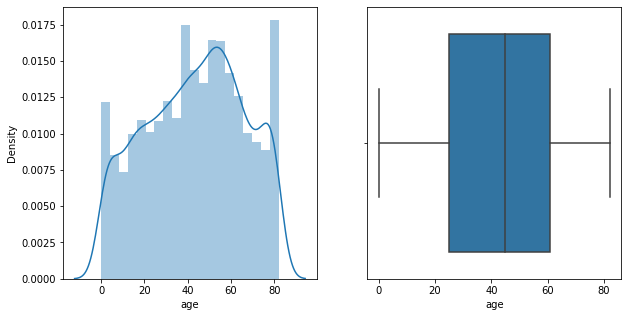

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(stroke['age'])
plt.subplot(1,2,2)
sns.boxplot(stroke['age'])
plt.show


In the above diagram as we can see the majority of age group is belong from 40 to 82 displot peak is right side and tail is on left side that data is neagtive 

Box plot tell the five summary of descriptive statistic
In the boxplot no outlier is present it clearly seen in the above diagram of boxplot it shown minimum value lies in the scale 0 and lower quartile value lies in the scale 25 and median value lies in the scale 45 and upper quartile value lies in the scale 62 and maximum value lies in the scale above 80 

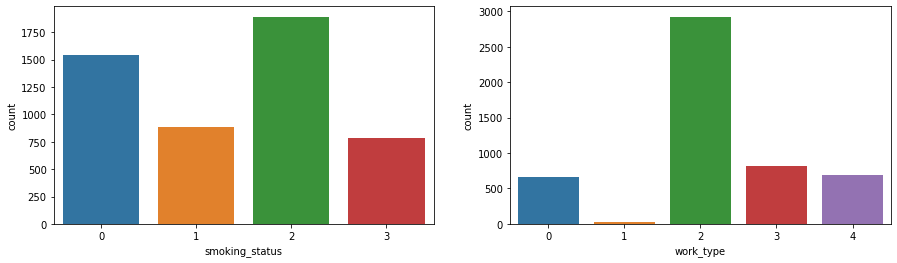

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(stroke['smoking_status'])
plt.subplot(1,2,2)
sns.countplot(stroke['work_type'])

in above diagram of smoking_status the majority of patients are never smoked around 4.9% and 7.92% people are formely smoked and 5.32% people are smokes and 3.06% are Unknowns its mean these are the children in unkown gruop

In the work type columns the majority of private people are more as compared to others it might be due to less salary peoples have hypertension around 2800 people are doing private job and 850 peoples are self employed and 600 peoples have govtjob  some women and mens have childern they are homemaker 




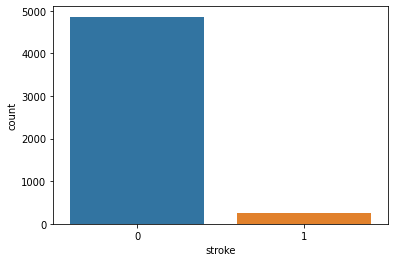

In [ ]:
sns.countplot(stroke['stroke'], label="Count")
plt.show()

the graph of blue color is assigned by 0 its mean the  4861 patients are not digonised by stroke  and  249 patients are digonised by stroke disease but in above graph its clearly seen that our data is imblanced the majority of class in 0 in comparision to 1 so we will use smote technique to handle this before splitting

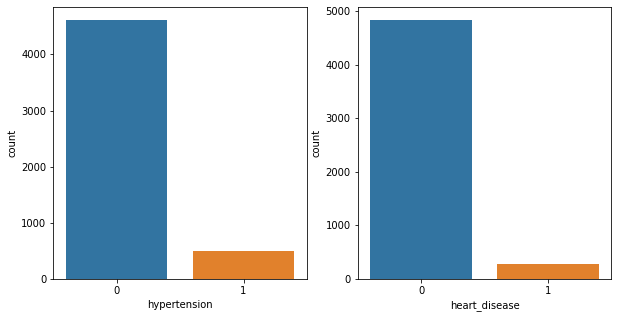

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(stroke['hypertension'])
plt.subplot(1,2,2)
sns.countplot(stroke['heart_disease'])

The blue chart is represt that 4612 people does not have a hypertension
and the orange chart represent 498 people have hypertension 

In the diagram of heart_disease  the blue chart represent 4834 people does not have heart disease and 276 people have heart disease  

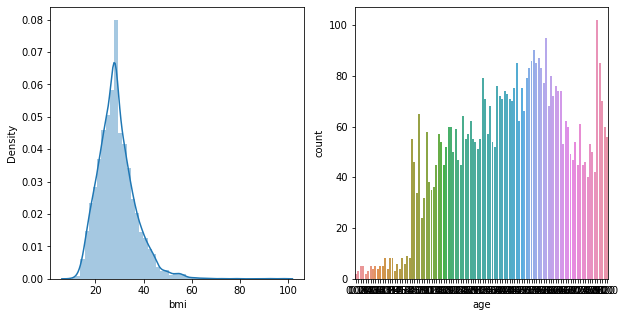

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(stroke['bmi'])
plt.subplot(1,2,2)
sns.countplot(stroke['age'])

the displot peak is on left side and right tail its mean positive
tht majority of bmi index of age group is between age of 15 to 50 and 25 to 35 age grop people of body mass index is very high and the come in the category of over weight and obese 

the majority of age group is belong to old people or above than 40 

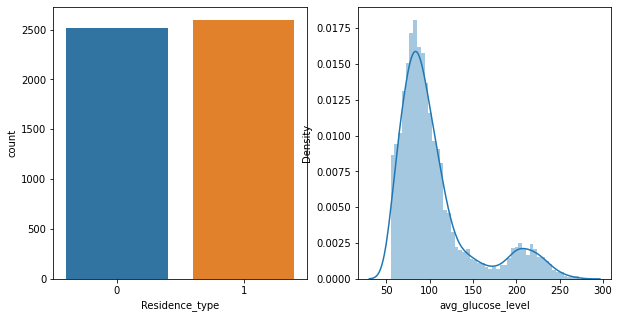

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(stroke['Residence_type'])
plt.subplot(1,2,2)
sns.distplot(stroke['avg_glucose_level'])

the urban peoples of majority is  high as comparison to Rural peoples 
around 2596 are live in urban ares and 2514 people are belong to Rural areas

the displot is lfet side and right tail its mean positive the avg glucose level
is high between 55 to 145 as shown in the graph 

Conclusion of graph

In our data it can be represented that people who have heart disease or hypertension are more likely to have a stroke. The percentage of women who suffered a stroke is similar to that of men and the type of work of people who have had a stroke is self-employed, my hypothesis is that by not having a fixed salary they can suffer from stress increasing the odds of stroke and people who smokes and formerly smoked are those who had a higher percentage of having a stroke because smoking is the cause of short and long term diseases.

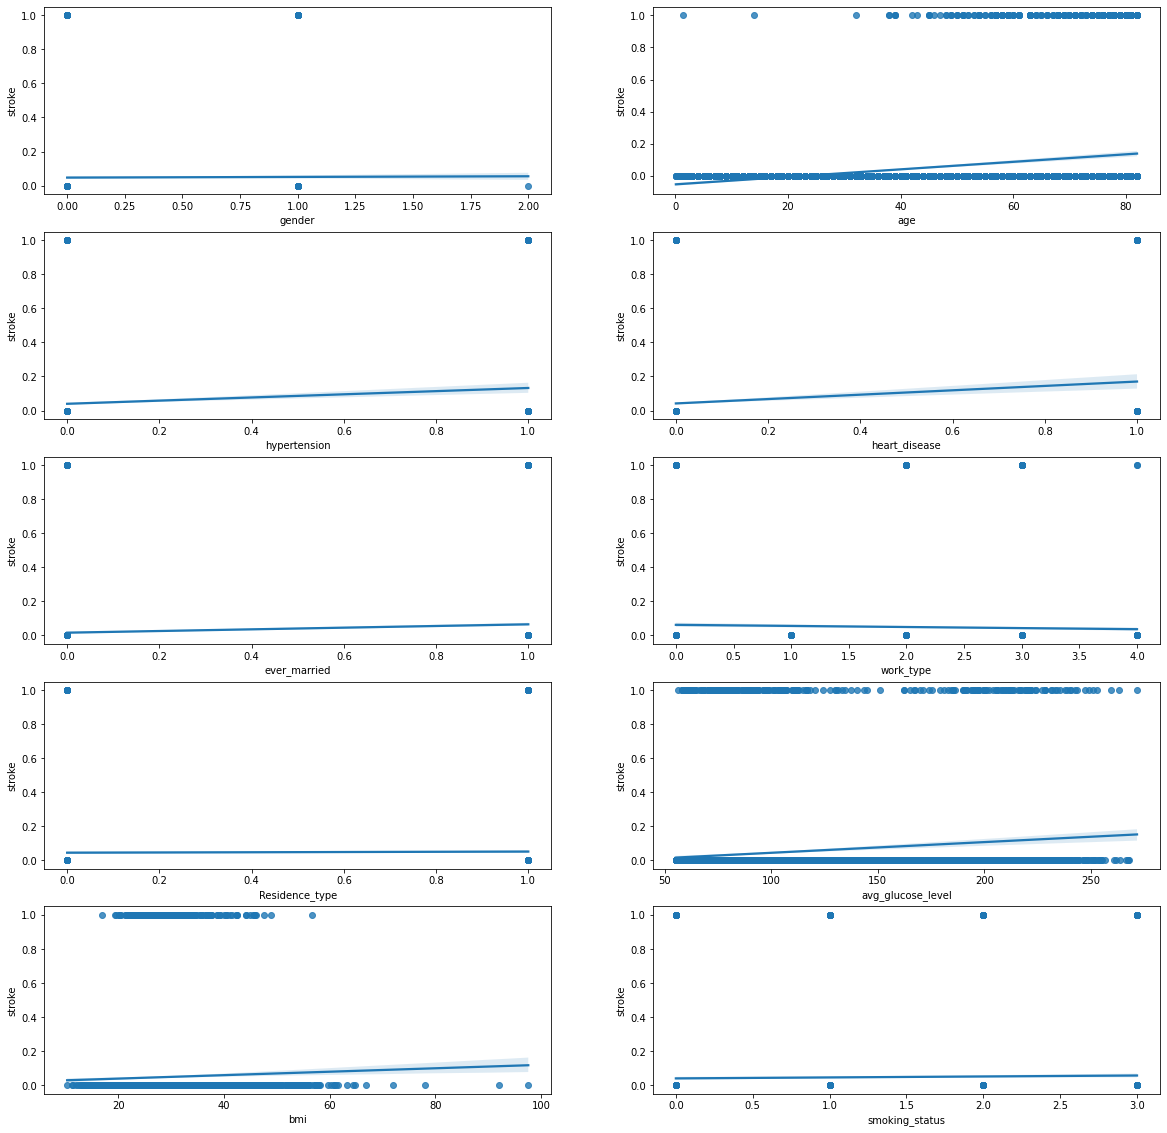

In [ ]:
# Get the correlation plot of numeric variable with the target variable
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10))= plt.subplots(nrows=5, ncols=2, figsize=(20,20))

sns.regplot(x=stroke["gender"], y=stroke["stroke"], scatter= True, fit_reg= True, ax=ax1)

sns.regplot(x=stroke["age"], y=stroke["stroke"], scatter=True, fit_reg= True, ax=ax2)

sns.regplot(x=stroke["hypertension"], y=stroke["stroke"], scatter=True, fit_reg=True, ax=ax3)

sns.regplot(x=stroke["heart_disease"], y=stroke["stroke"], scatter=True, fit_reg=True, ax=ax4)

sns.regplot(x=stroke["ever_married"], y=stroke["stroke"], scatter=True, fit_reg=True, ax=ax5)

sns.regplot(x=stroke["work_type"], y=stroke["stroke"], scatter=True, fit_reg=True, ax=ax6)

sns.regplot(x=stroke["Residence_type"], y=stroke["stroke"], scatter=True, fit_reg=True, ax=ax7)

sns.regplot(x=stroke["avg_glucose_level"], y=stroke["stroke"], scatter=True, fit_reg=True, ax=ax8)

sns.regplot(x=stroke["bmi"], y=stroke["stroke"], scatter=True, fit_reg=True, ax=ax9)

sns.regplot(x=stroke["smoking_status"], y=stroke["stroke"], scatter=True, fit_reg=True, ax=ax10)

# sns.regplot(x=train["GarageCars"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax7)

plt.show()

In [ ]:
df1 =stroke[['age','gender','heart_disease','hypertension','smoking_status','stroke']]

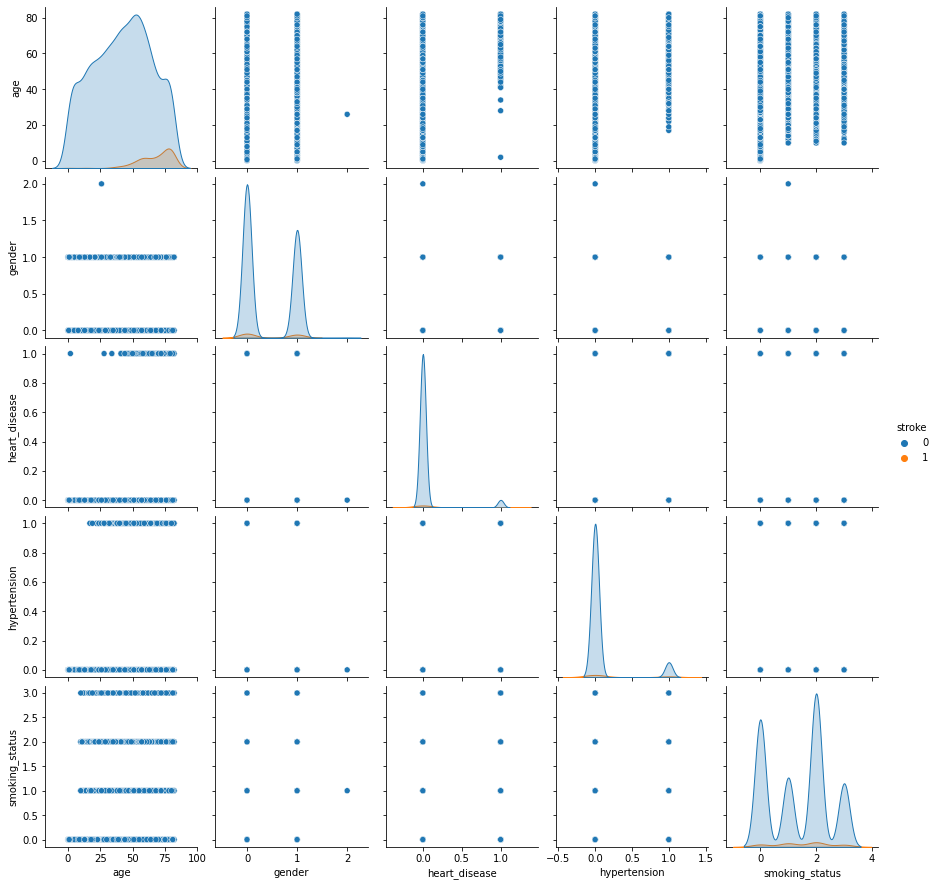

In [ ]:
sns.pairplot(df1,hue='stroke')

Pairplot Compare to the other feature and show the relation of two features

We obseverd that in pairplot of age and heart disease 0 define the patients does not have hear disease and 1 define the patients has hear disease so it clearly seen that from child to adult does not have heart disease those data points ploted on 0 scale and those data point ploted on 1 scale  majority of people from above 45 to 82 people have heart disease and few people have heart disease below the age of 45 basically they are  ouliers





In [ ]:
df2 = stroke[['bmi','ever_married','work_type','Residence_type','avg_glucose_level','stroke']]

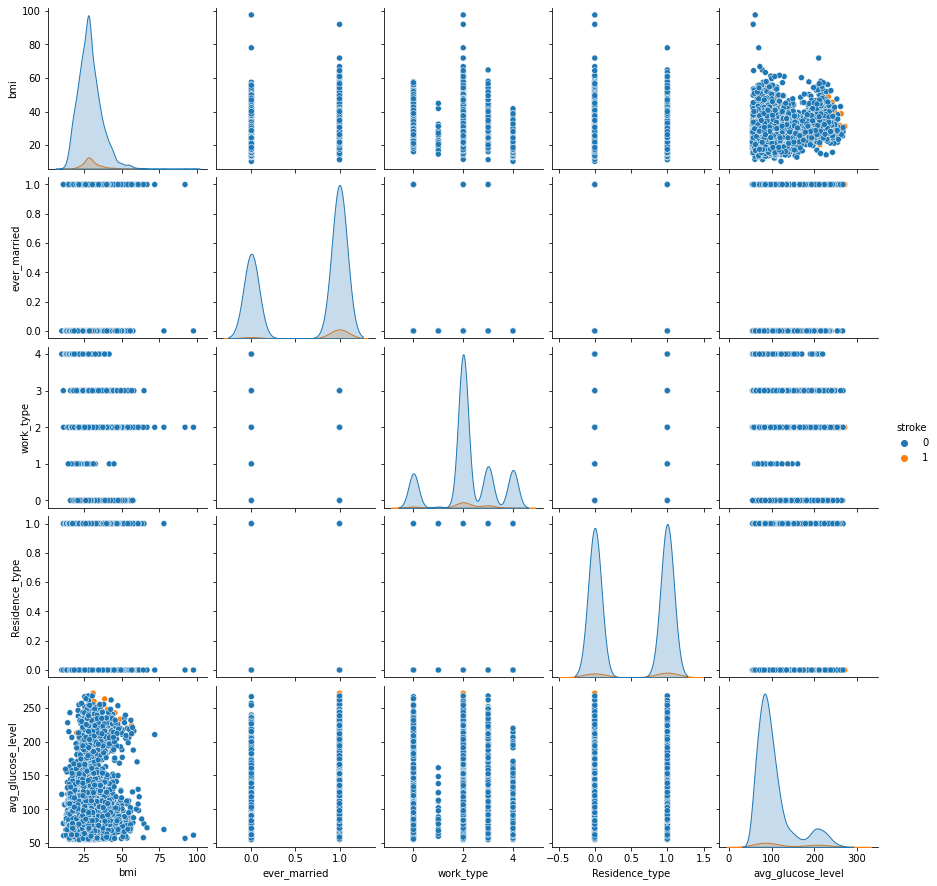

In [ ]:
sns.pairplot(df2,hue='stroke')

The avg_glucose_level and BMI the majority of age people from 5 to 52 and gluecose level 55 to 165 patiend has lies in thhis category and some ae ouliers are present which are out of the range 

In [ ]:
corr = stroke.corr()
corr

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026952,-0.062581,0.008929
age,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.324296,0.265199,0.245257
hypertension,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.158293,0.111038,0.127904
heart_disease,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.036916,0.048460,0.134914
ever_married,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.334911,0.259647,0.108340
work_type,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299172,-0.305927,-0.032316
Residence_type,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000277,0.008237,0.015458
avg_glucose_level,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.166876,0.063437,0.131945
bmi,-0.026952,0.324296,0.158293,0.036916,0.334911,-0.299172,-0.000277,0.166876,1.000000,0.218968,0.036110
smoking_status,-0.062581,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.218968,1.000000,0.028123


**Correlation tell the relationship in between two variables either it can be positive or negative and its range between 0 to 1**

1)As we can see above the correlation matrix if we observe to our **target features that is stroke**  **the correlation of stroke and age is highly positive in nature** thats mean **age is really matter for stroke disease** if age is increase so the more chances of getting stroke , **Even also the age  correlation with other independent features are like hypertension, heart_disease, ever_married,avg_glucose_level,bmi is highly positive in nature thats mean age is really matter in this data** 

2) **The hypertension , heart_disease, ever_married, avg_glucose_level are less highly positive correlation with stroke thats mean they are also really effect to stroke disease in this data**  if a patient have high hypertension or average gluecole_level and heart disease then he has more chances of getting stroke but its depends on the patients age and all these things the patients has or not any thing out of them 

3) **the Residence type, BMI, smoking status are very low postive correlation with stroke features** they are less effect  to the stroke features but if the patient has high BMI and he does formely smoke then depends on the patients he can be digonise to stroke disease 

4)  age and work_type there is no correlation with the stroke they are not really much matter to stroke disease 

5)No strong correlation between our features


# **Correlation Matrix in EDA FORM**

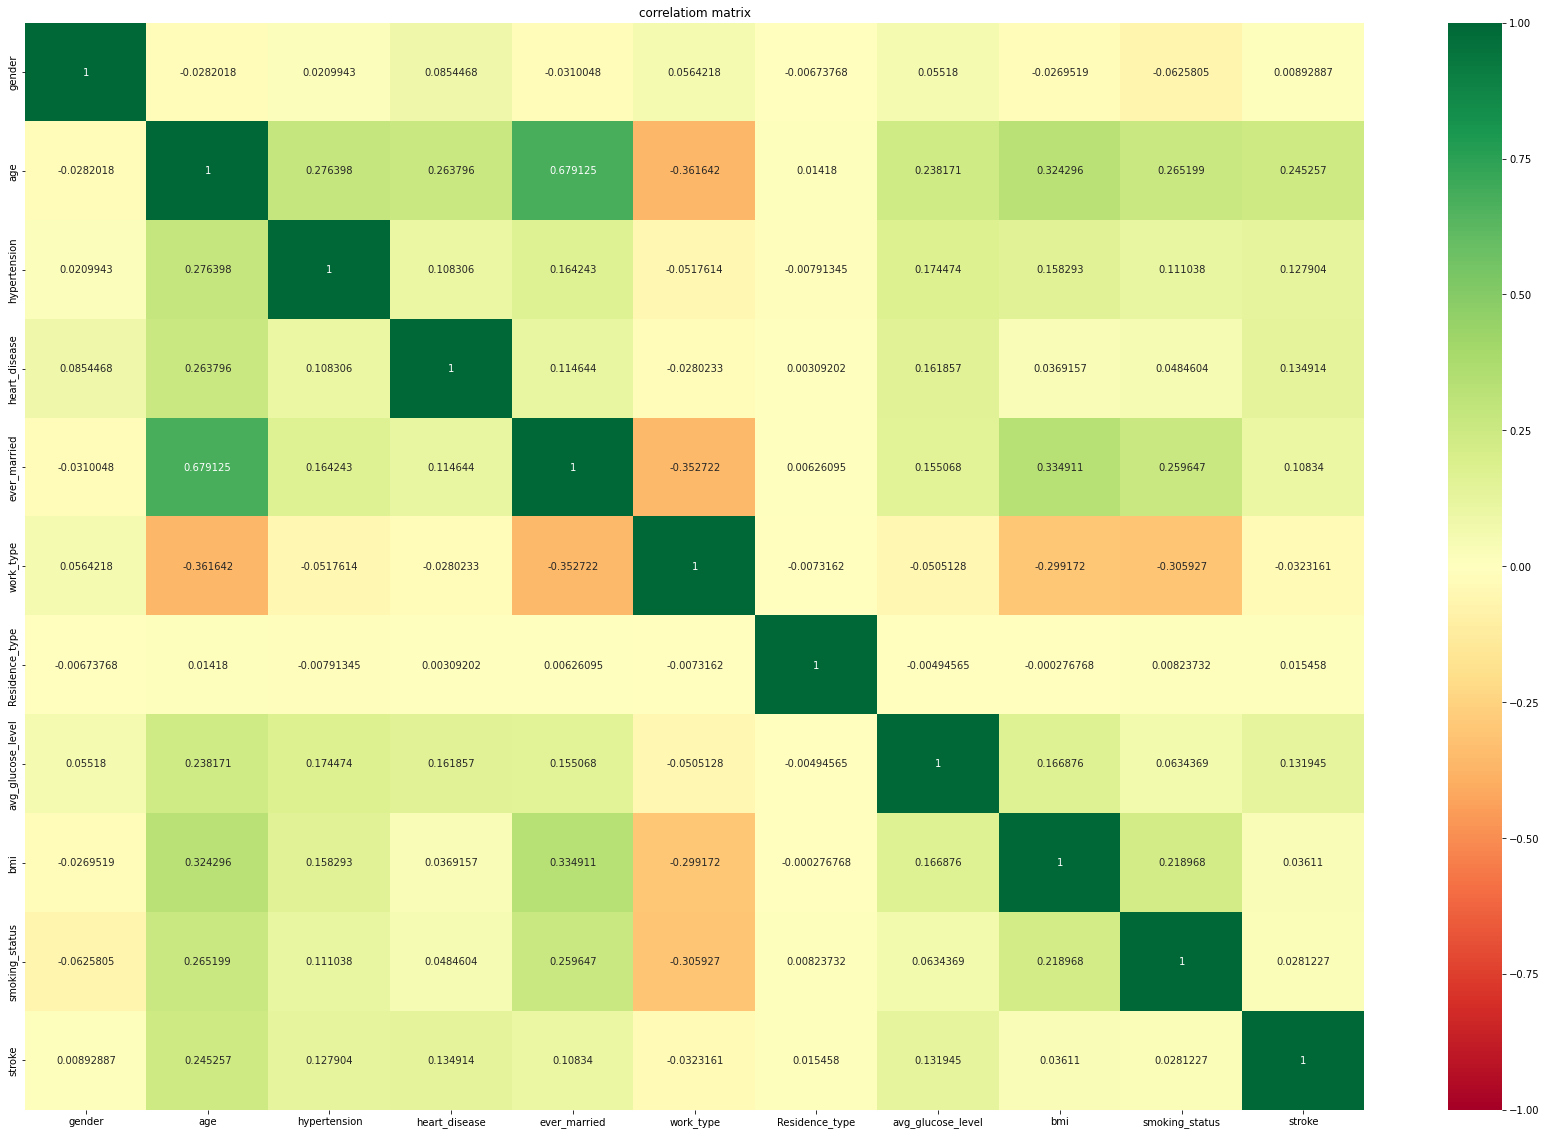

In [ ]:
plt.figure(figsize=(30,20))
plt.title("correlatiom matrix")
sns.heatmap(corr,vmax=+1,vmin=-1,fmt='g',cmap='RdYlGn',annot=True)
plt.show()

# **Observations:** 

**In the above visualization correlation matrix** 

**the less Dark green color** represent The highest correlation can be observed in between the ever_married and age features 

**the Light green color** represent the less high postive correlation in between the features are like bmi and age, bmi and ever_married, heart_disease and age, hyper_tension etc


**the very light green color represent** very less highly postive correlation in betweeb the fetaure like avg_glucose level and hear_disease, smoking status and bmi etc 

**the light cream color represent** very low positive correlation in between the two features like age and residence_type etc


**The orange color represent no correlation** in between the two features because the correlation are in negative in nature like bmi and work_type etc



In [ ]:
a = corr[['stroke']]
a

,stroke
gender,0.008929
age,0.245257
hypertension,0.127904
heart_disease,0.134914
ever_married,0.108340
work_type,-0.032316
Residence_type,0.015458
avg_glucose_level,0.131945
bmi,0.036110
smoking_status,0.028123


In the above Diagram the stoke correlation values are in data Frame it represent all the correlation values of all the independent features out of them age is highly correlated and there is no correlation with work_type because its Negative correlation  

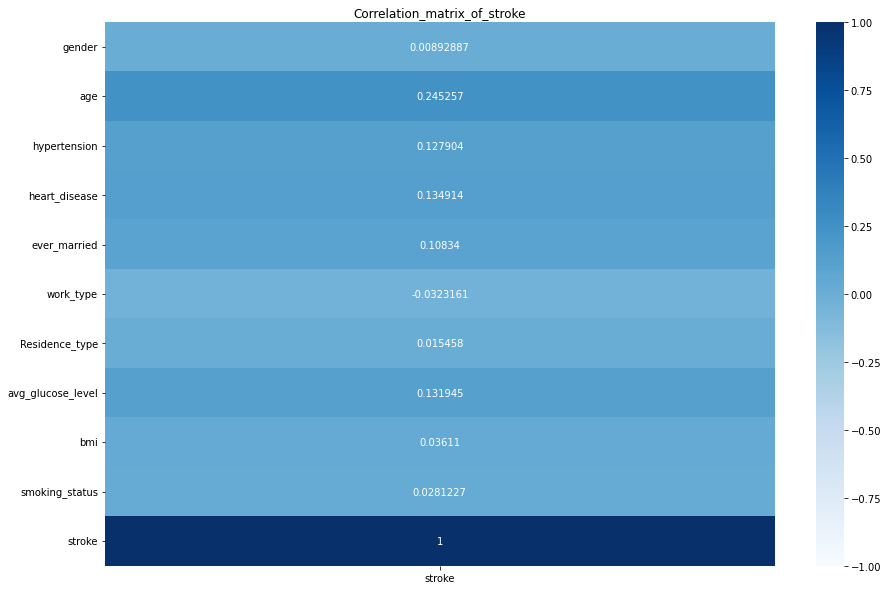

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Correlation_matrix_of_stroke')
sns.heatmap(a,vmax=+1,vmin=-1,fmt='g',cmap='Blues',annot=True)
plt.show()

Visualization Stroke of Correlation matrix in this its shows the correlation matrix of sroke disease the light dark blue color represent that is age is highly positive correlation and very light in blue shows the no correlation 

# **Handling Imbalance data sets by using SMOTE Technique**

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm=SMOTE()

In [ ]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({'stroke': 1})


In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'stroke': 1})


In [ ]:
y_res['stroke'].value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

Text(0.5, 1.0, 'Resampled Dataset shape')

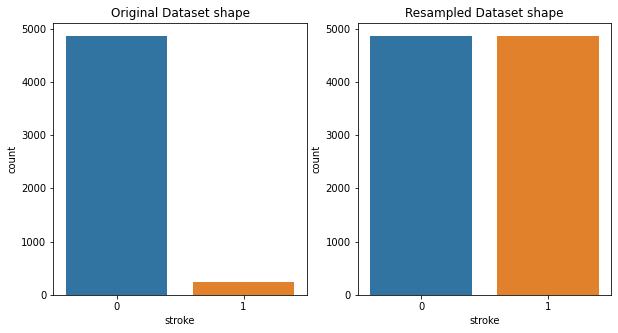

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(stroke['stroke'])
plt.title('Original Dataset shape')
plt.subplot(1,2,2)
sns.countplot(y_res['stroke'])
plt.title('Resampled Dataset shape')

# **We are now ready for model building**

# **Model Building**

In [ ]:
# Number of columns present in the data 
stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
X = stroke[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status']]
y= stroke[['stroke']]

Here we have Stored all My Independent features in **(X Variables)** and My target variables that is **stroke features** means Dependent Variable stored in a **(y Variable)** on the basis of my independent features we will predict the our target variables with the help of algorithm and which algorithm perfome better we will
consider that algorithm and observed that in future how much patients likely to get stroked or not 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=1)

Given our training and testing sets, we will now try several models to see which results in the greatest accuracy. Specifically, we will try logistic regression, Decison Tree, the RandomForest classifier, the AdaBoost classifier, the GradientBoosting classifier, XGBoost Classifier, Cat Boost, and the KNeighbors classifierb Bagging, Naive_base

In [ ]:
print(X_train.shape),print(X_test.shape),print(y_train.shape),print(y_test.shape)

(6805, 10)
(2917, 10)
(6805, 1)
(2917, 1)


(None, None, None, None)

**there are 13,610 data in training dataset and 5,834 data in testing dataset**

# **SUPERVISE MACHINE LEARNING**

**I use classification algorithm because my dependent variable in categorical form**

# **a) LOGISTIC REGRESSION**

**for classification algorithms, let’s start off with logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR =LogisticRegression()

In [ ]:
LR.fit(X_train,y_train)

LogisticRegression()

In [ ]:
LR_pred = LR.predict(X_test)

In [ ]:
LR.score(X_train,y_train)*100

80.67597354886114

In [ ]:
accuracy_score(y_test,LR_pred)*100

80.93932122043195

In Logistic Regression the train accuracy is 80.68% and test accuracy is 80.94%
and the difference is only between train and test is 0.26% that means model is accurately trained and not overfitted thats why algorithm performing well

In [ ]:
cf = confusion_matrix(y_test,LR_pred)
cf

array([[1133,  320],
       [ 236, 1228]])

This ia a confusion matrix where TN value is 1133 , 320 in FP , 236 in FN and 1228 in TP

In [ ]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1453
           1       0.79      0.84      0.82      1464

    accuracy                           0.81      2917
   macro avg       0.81      0.81      0.81      2917
weighted avg       0.81      0.81      0.81      2917



 IN Classification Report
 
 precession 83% value in 0 and 79% value in 1
 Recall 78% value in 0 and 84% value in 1 
 f1-score 80% value in 0 and 82% value in 1  

 the accuracy score is  good but all precision, recall and f1-
score lie in the range of 0.78-0.83

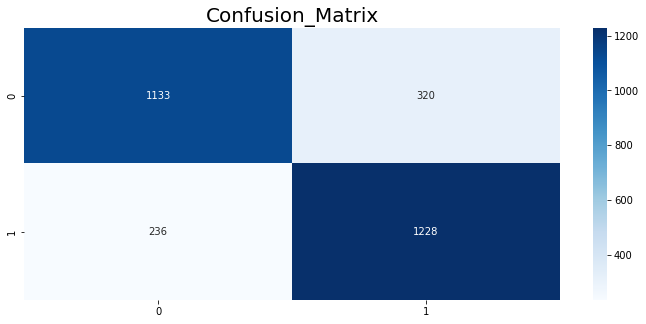

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(cf,annot=True,fmt='g',cmap='Blues')
plt.title('Confusion_Matrix',fontsize=20)
plt.show()

In Above Confusion Matrix we can see that **1133 are true Negative** that means the will not have a stroke disease (actual and predicted) and **320 are false Positive** that means they have a stroke disease in actual but after using this technique they will not have a stroke disease and  we can see that **1228 are true Positive** that means the will have Stroke disease (Actual and Predicted) and **236 are False Negative** thats means they are not stroke disease in actual but after using the this technique they will Have a stroke disease

# **b) DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
 DT = DecisionTreeClassifier(criterion='entropy',max_depth=7)

In [ ]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [ ]:
DT_pred = DT.predict(X_test)

In [ ]:
DT_pred

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
DT.score(X_train,y_train)*100

85.87803085966202

In [ ]:
accuracy_score(y_test,DT_pred)*100

82.79053822420295

In Logistic Regression the train accuracy is 85.87% and test accuracy is 82.79% and the difference is only between train and test is 3.08% that means model is accurately trained and not overfitted thats why algorithm performing well

In [ ]:
cf = confusion_matrix(y_test,DT_pred)
cf

array([[1096,  357],
       [ 145, 1319]])

This ia a confusion matrix where TN value is 1096 , 145 in FN , 357 in FP and 1319 in TP

In [ ]:
print(classification_report(y_test,DT_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1453
           1       0.79      0.90      0.84      1464

    accuracy                           0.83      2917
   macro avg       0.84      0.83      0.83      2917
weighted avg       0.83      0.83      0.83      2917



 IN Classification Report
 
 precession 88% value in 0 and 79% value in 1
 Recall 75% value in 0 and 90% value in 1 
 f1-score 81% value in 0 and 84% value in 1  

 the accuracy score is high but all precision, recall and f1-
score lie in the range of 0.75-0.90

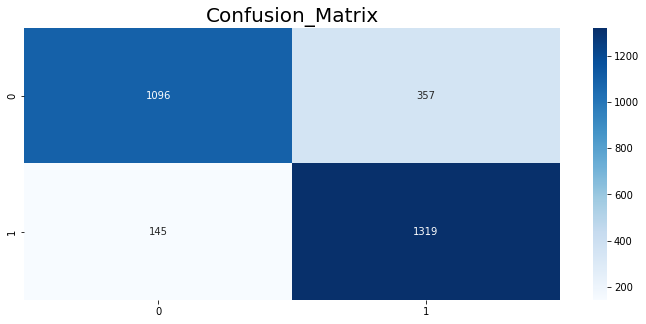

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(cf,annot=True,fmt='g',cmap='Blues')
plt.title('Confusion_Matrix',fontsize=20)
plt.show()

In Above Confusion Matrix we can see that **1096 are true Negative** that means the will not have a stroke disease (actual and predicted) and **357 are false Positive** that means they have a stroke disease in actual but after using this technique they will not have a stroke disease and we can see that **1319 are true Positive** that means the will have Stroke disease (Actual and Predicted) and **145 are False Negative** thats means they are not stroke disease in actual but after using the this technique they will Have a stroke disease


# **ENSEMBLE TECHNIQUE** 

# **a) RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=5)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=500)

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
rf_pred

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
rf.score(X_train,y_train)*100

84.0558412931668

In [ ]:
accuracy_score(y_test,rf_pred)*100

83.51045594789167

In Random Forest the train accuracy is 83.86% and test accuracy is 83.48% and the difference is only between train and test is 0.39% that means model is accurately trained and not overfitted thats why algorithm performing well

In [ ]:
cf = confusion_matrix(y_test,rf_pred)
cf

array([[1078,  375],
       [ 106, 1358]])

This ia a confusion matrix where TN value is 1079 , 0 in FN , 108 in 374 FP and 1356 in TP

In [ ]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1453
           1       0.78      0.93      0.85      1464

    accuracy                           0.84      2917
   macro avg       0.85      0.83      0.83      2917
weighted avg       0.85      0.84      0.83      2917



 IN Classification Report
 
 precession 91% value in 0 and 78% value in 1
 Recall 74% value in 0 and 93% value in 1 
 f1-score 82% value in 0 and 85% value in 1  

 the accuracy score is high but all precision, recall and f1-
score lie in the range of 0.74-0.93

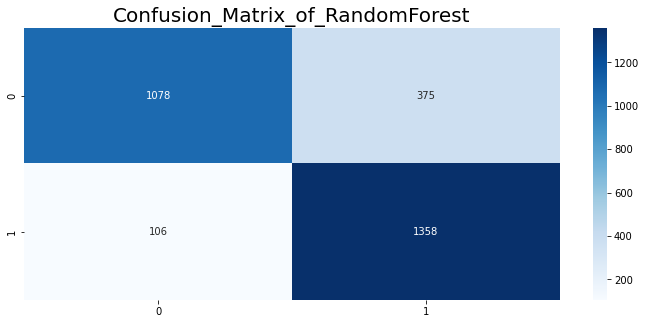

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(cf,annot=True,fmt='g',cmap='Blues')
plt.title('Confusion_Matrix_of_RandomForest',fontsize=20)
plt.show()

In Above Confusion Matrix we can see that 1079 are true Negative that means the will not have a stroke disease (actual and predicted) and 374 are false Positive that means they have a stroke disease in actual but after using this technique they will not have a stroke disease and we can see that 1356 are true Positive that means the will have Stroke disease (Actual and Predicted) and 108 are False Negative thats means they are not stroke disease in actual but after using the this technique they will Have a stroke disease

# **b) ADA BOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier()

In [ ]:
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
ada_pred= ada.predict(X_test)

In [ ]:
ada_pred

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
ada.score(X_train,y_train)*100

84.77590007347538

In [ ]:
accuracy_score(y_test,ada_pred)*100

85.1559821734659

In Ada Boost the train accuracy is 95.33% and test accuracy is 94.45% and the difference is only between train and test is 0.88% that means model is accurately trained and not overfitted thats why algorithm performing well

In [ ]:
cf = confusion_matrix(y_test,ada_pred)
cf

array([[1197,  256],
       [ 177, 1287]])

This ia a confusion matrix where TN value is 1197 , 177 in FN , 256 in FP and 1287 in TP

In [ ]:
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1453
           1       0.83      0.88      0.86      1464

    accuracy                           0.85      2917
   macro avg       0.85      0.85      0.85      2917
weighted avg       0.85      0.85      0.85      2917



IN Classification Report

precession 87% value in 0 and 83% value in 1 Recall 82% value in 0 and 88% value in 1
 f1-score 85% value in 0 and 86% value in 1

 the accuracy score is high but all precision, recall and f1-
score lie in the range of 0.82-0.88

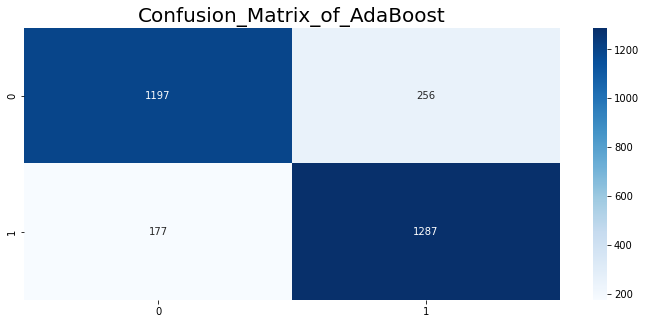

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(cf,annot=True,fmt='g',cmap='Blues')
plt.title('Confusion_Matrix_of_AdaBoost',fontsize=20)
plt.show()

In Above Confusion Matrix we can see that 1197 are true Negative that means the will not have a stroke disease (actual and predicted) and 256 are false Positive that means they have a stroke disease in actual but after using this technique they will not have a stroke disease and we can see that 1287 are true Positive that means the will have Stroke disease (Actual and Predicted) and 177 are False Negative thats means they are not stroke disease in actual but after using the this technique they will Have a stroke disease

# **c) GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gd = GradientBoostingClassifier()

In [ ]:
gd.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
gd_pred = gd.predict(X_test)

In [ ]:
gd.score(X_train,y_train)*100

88.71418074944893

In [ ]:
accuracy_score(y_test,gd_pred)*100

87.58998971546109

In Gradient Boosting the train accuracy is 88.71% and test accuracy is 87.58% and the difference is only between train and test is 1.13% that means model is accurately trained and not overfitted thats why algorithm performing well

In [ ]:
cf = confusion_matrix(y_test,gd_pred)
cf

array([[1218,  235],
       [ 127, 1337]])

This ia a confusion matrix where TN value is 1218, 127 in FN , 235 in FP and 1337 in TP

In [ ]:
print(classification_report(y_test,gd_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1453
           1       0.85      0.91      0.88      1464

    accuracy                           0.88      2917
   macro avg       0.88      0.88      0.88      2917
weighted avg       0.88      0.88      0.88      2917



IN Classification Report

precession 91% value in 0 and 84% value in 1 Recall 84% value in 0 and 91% value in 1 f1-score 87% value in 0 and 88% value in 1

the accuracy score is  very high but all precision, recall and f1-
score lie in the range of 0.84-0.91

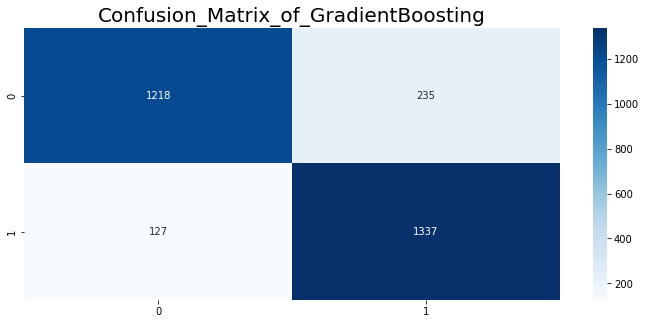

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(cf,annot=True,fmt='g',cmap='Blues')
plt.title('Confusion_Matrix_of_GradientBoosting',fontsize=20)
plt.show()

In Above Confusion Matrix we can see that 1218 are true Negative that means the will not have a stroke disease (actual and predicted) and 235 are false Positive that means they have a stroke disease in actual but after using this technique they will not have a stroke disease and we can see that 1337 are true Positive that means the will have Stroke disease (Actual and Predicted) and 127 are False Negative thats means they are not stroke disease in actual but after using the this technique they will Have a stroke disease

# **d) XG BOOST**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier()

In [ ]:
xgb_pred = xgb.predict(X_test)

In [ ]:
xgb.score(X_train,y_train)*100

88.14107274063188

In [ ]:
accuracy_score(y_test,xgb_pred)*100

86.6643812135756

In XG Boost the train accuracy is 88.14% and test accuracy is 86.66% and the difference is only between train and test is 1.48% that means model is accurately trained and not overfitted thats why algorithm performing well

In [ ]:
cf = confusion_matrix(y_test,xgb_pred)
cf

array([[1198,  255],
       [ 134, 1330]])

This ia a confusion matrix where TN value is 1198, 134 in FN , 255 in FP and 1330 in TP

In [ ]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1453
           1       0.84      0.91      0.87      1464

    accuracy                           0.87      2917
   macro avg       0.87      0.87      0.87      2917
weighted avg       0.87      0.87      0.87      2917



IN Classification Report

precession 90% value in 0 and 84% value in 1 Recall 82% value in 0 and 91% value in 1 f1-score 86% value in 0 and 87% value in 1

the accuracy score is high but all precision, recall and f1-
score lie in the range of 0.82-91

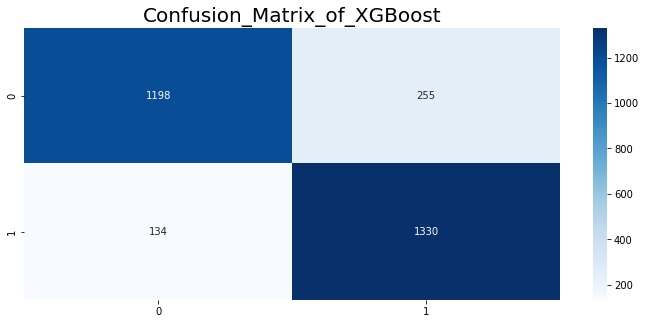

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(cf,annot=True,fmt='g',cmap='Blues')
plt.title('Confusion_Matrix_of_XGBoost',fontsize=20)
plt.show()

In Above Confusion Matrix we can see that **1198 are true Negative** that means the will not have a stroke disease (actual and predicted) and **255 are false Positive** that means they have a stroke disease in actual but after using this technique they will not have a stroke disease and we can see that **1330 are true Positive** that means the will have Stroke disease (Actual and Predicted) and **134 are False Negative** thats means they are not stroke disease in actual but after using the this technique they will Have a stroke disease

# **e) CATBOOST**

In [ ]:
pip  install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat = CatBoostClassifier()

In [ ]:
cat.fit(X_train,y_train)

Learning rate set to 0.023364
0:	learn: 0.6756716	total: 49.8ms	remaining: 49.7s
1:	learn: 0.6606851	total: 53.3ms	remaining: 26.6s
2:	learn: 0.6464186	total: 56.4ms	remaining: 18.7s
3:	learn: 0.6331325	total: 59.4ms	remaining: 14.8s
4:	learn: 0.6196021	total: 62.6ms	remaining: 12.4s
5:	learn: 0.6069666	total: 66.4ms	remaining: 11s
6:	learn: 0.5941887	total: 69.4ms	remaining: 9.85s
7:	learn: 0.5826544	total: 72.5ms	remaining: 8.99s
8:	learn: 0.5716272	total: 75.9ms	remaining: 8.36s
9:	learn: 0.5607739	total: 79ms	remaining: 7.82s
10:	learn: 0.5530070	total: 82.1ms	remaining: 7.38s
11:	learn: 0.5454006	total: 85.3ms	remaining: 7.03s
12:	learn: 0.5377348	total: 88.4ms	remaining: 6.71s
13:	learn: 0.5289275	total: 91.5ms	remaining: 6.44s
14:	learn: 0.5196844	total: 94.6ms	remaining: 6.21s
15:	learn: 0.5131799	total: 97.6ms	remaining: 6s
16:	learn: 0.5059302	total: 101ms	remaining: 5.82s
17:	learn: 0.5001653	total: 104ms	remaining: 5.66s
18:	learn: 0.4944927	total: 107ms	remaining: 5.51s
19

In [ ]:
cat_pred = cat.predict(X_test)

In [ ]:
cat.score(X_train,y_train)*100

97.10506980161647

In [ ]:
accuracy_score(y_test,cat_pred)*100

93.41789509770312

In XG Boost the train accuracy is 97.10% and test accuracy is 93.41% and the difference is only between train and test is 3.69% that means model is accurately trained and not overfitted thats why algorithm performing well

In [ ]:
cf = confusion_matrix(y_test,cat_pred)
cf

array([[1323,  130],
       [  62, 1402]])

This ia a confusion matrix where TN value is 1323, 62 in FN , 130 in FP and 1402 in TP

In [ ]:
print(classification_report(y_test,cat_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1453
           1       0.92      0.96      0.94      1464

    accuracy                           0.93      2917
   macro avg       0.94      0.93      0.93      2917
weighted avg       0.94      0.93      0.93      2917



IN Classification Report

precession 96% value in 0 and 92% value in 1 Recall 91% value in 0 and 96% value in 1 f1-score 93% value in 0 and 94% value in 1

the accuracy score is high but all precision, recall and f1-
score lie in the range of 0.91-0.96

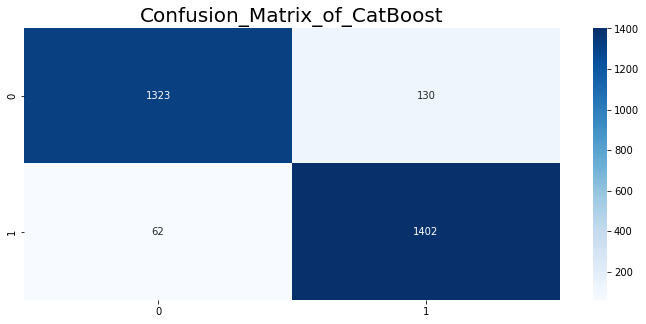

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(cf,annot=True,fmt='g',cmap='Blues')
plt.title('Confusion_Matrix_of_CatBoost',fontsize=20)
plt.show()

In Above Confusion Matrix we can see that **1323 are true Negative** that means the will not have a stroke disease (actual and predicted) and **130 are false Positive** that means they have a stroke disease in actual but after using this technique they will not have a stroke disease and we can see that** 1402 are true Positive** that means the will have Stroke disease (Actual and Predicted) and **62  are False Negative** thats means they are not stroke disease in actual but after using the this technique they will Have a stroke disease

# **3) KNeighborsClassifie**r

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
knn_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
knn.score(X_train,y_train)*100

98.94195444526083

In [ ]:
accuracy_score(y_test,knn_pred)*100

91.87521426122728

In Knn Classifier the train accuracy is 98.94% and test accuracy is 91.87% and the difference is only between train and test is 7.07% that means model is accurately trained and not overfitted thats why algorithm performing well 

In [ ]:
cf = confusion_matrix(y_test,knn_pred)
cf

array([[1288,  165],
       [  72, 1392]])

This ia a confusion matrix where TN value is 1288, 72 in FN , 165 in FP and 1392 in TP

In [ ]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1453
           1       0.89      0.95      0.92      1464

    accuracy                           0.92      2917
   macro avg       0.92      0.92      0.92      2917
weighted avg       0.92      0.92      0.92      2917



IN Classification Report

precession 95% value in 0 and 89% value in 1 Recall 89% value in 0 and 95% value in 1 f1-score 92% value in 0 and 92% value in 1

the accuracy score is not high but all precision, recall and f1-
score lie in the range of 0.4-0.99

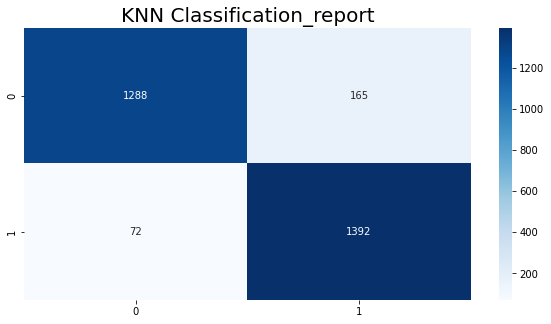

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(cf,fmt='g',cmap='Blues',annot=True)
plt.title('KNN Classification_report',fontsize=20)
plt.show()

In Above Confusion Matrix we can see that 1288 are true Negative that means the will not have a stroke disease (actual and predicted) and 165 are false Positive that means they have a stroke disease in actual but after using this technique they will not have a stroke disease and we can see that 1392 are true Positive that means the will have Stroke disease (Actual and Predicted) and 72 are False Negative thats means they are not stroke disease in actual but after using the this technique they will Have a stroke disease

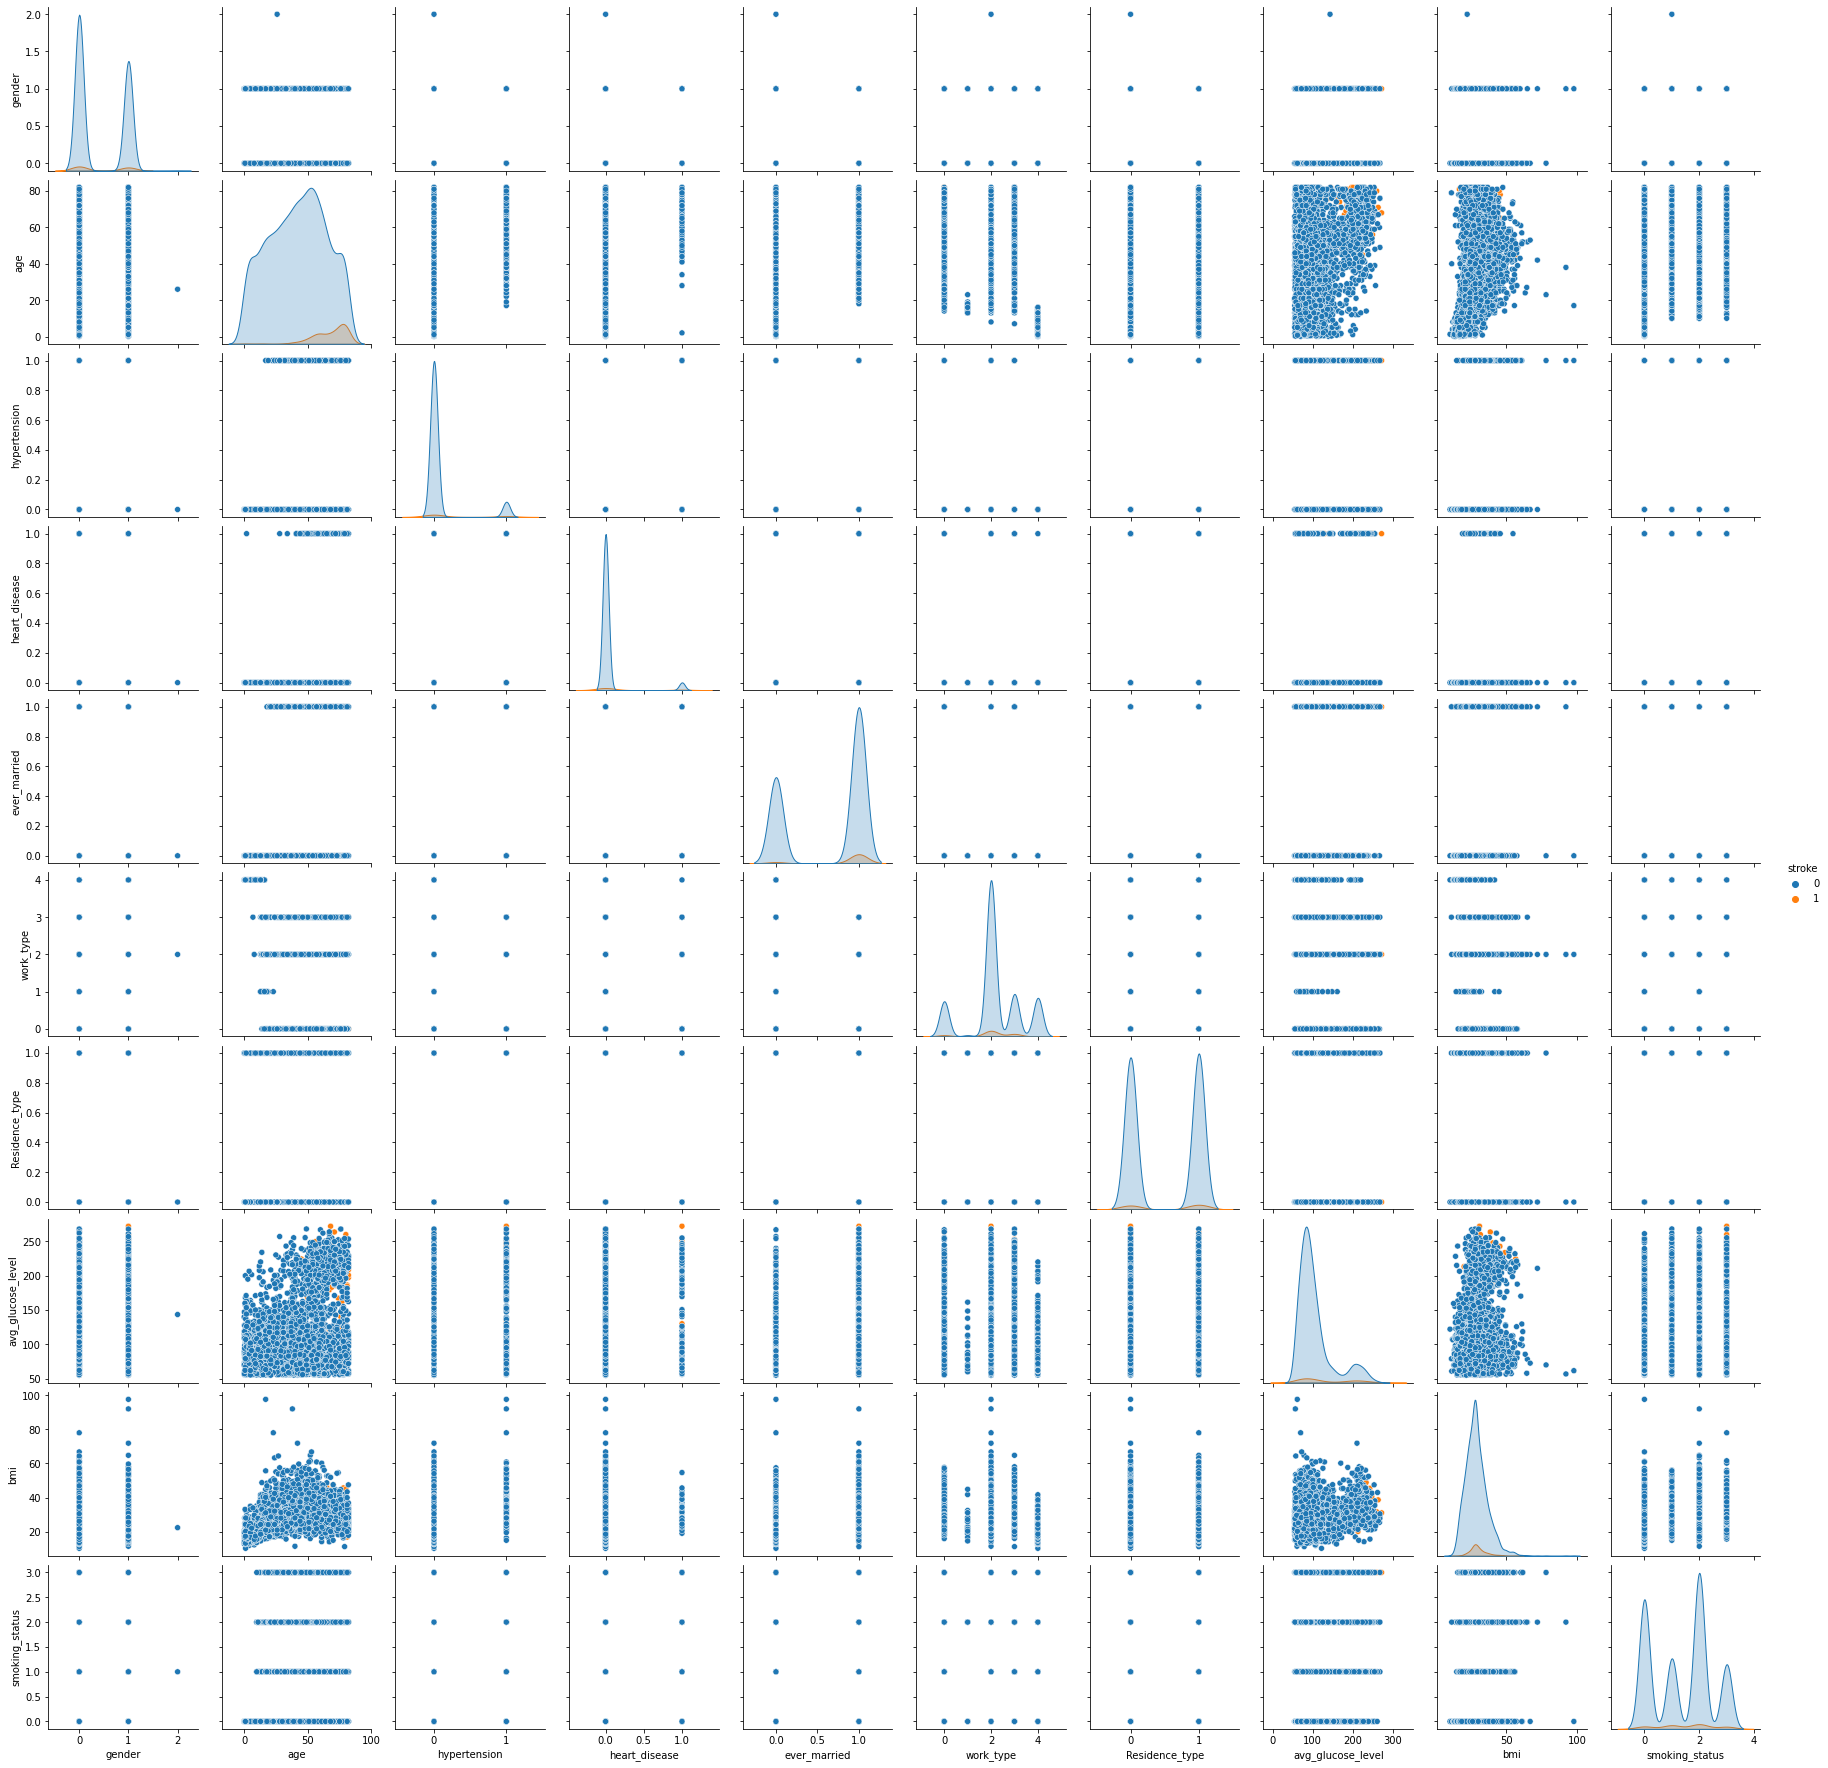

In [ ]:
sns.pairplot(stroke,hue='stroke')

# **4) NAIVE BASE**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
gnb_pred = gnb.predict(X_test)

In [ ]:
gnb_pred

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
gnb.score(X_train,y_train)*100

79.33872152828802

In [ ]:
accuracy_score(y_test,gnb_pred)*100

79.29379499485773

In Knn Classifier the train accuracy is 79.33% and test accuracy is 79.29% and the difference is only between train and test is 0.04% that means model is accurately trained and not overfitted thats why algorithm performing well

In [ ]:
print(classification_report(y_test,gnb_pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1453
           1       0.76      0.87      0.81      1464

    accuracy                           0.79      2917
   macro avg       0.80      0.79      0.79      2917
weighted avg       0.80      0.79      0.79      2917



IN Classification Report

precession 84% value in 0 and 76% value in 1 Recall 72% value in 0 and 87% value in 1 f1-score 78% value in 0 and 81% value in 1

the accuracy score is not high but all precision, recall and f1-
score lie in the range of 0.72-0.87

In [ ]:
cf = confusion_matrix(y_test,gnb_pred)
cf

array([[1042,  411],
       [ 193, 1271]])

This ia a confusion matrix where TN value is 1042, 193 in FN , 411 in FP and 1271 in TP

Text(0.5, 1.0, 'Correlation_of_naive_base')

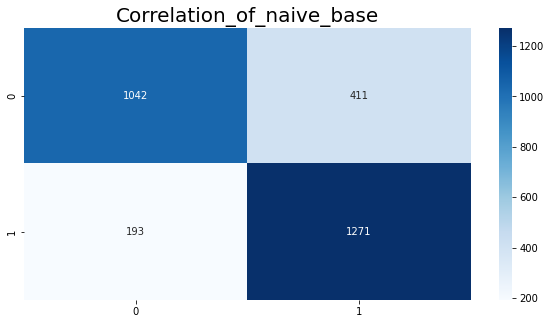

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(cf,cmap='Blues',fmt='g',annot=True)
plt.title('Correlation_of_naive_base',fontsize=20)

In Above Confusion Matrix we can see that **1042 are true Negative** that means the will not have a stroke disease (actual and predicted) and **411 are false Positive** that means they have a stroke disease in actual but after using this technique they will not have a stroke disease and we can see that **1271 are true Positive** that means the will have Stroke disease (Actual and Predicted) and **193 are False Negative** thats means they are not stroke disease in actual but after using the this technique they will Have a stroke disease

# **5) SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel= 'linear')

In [ ]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
svc_pred=svc.predict(X_test)

In [ ]:
svc.score(X_train,y_train)*100

81.29316678912565

In [ ]:
accuracy_score(y_test,svc_pred)*100

81.24785738772712

In SVM Classifier the train accuracy is 81.29% and test accuracy is 81.24% and the difference is only between train and test is 0.05% that means model is accurately trained and not overfitted thats why algorithm performing well

In [ ]:
cf = confusion_matrix(y_test,svc_pred)
cf

array([[1123,  330],
       [ 217, 1247]])

This ia a confusion matrix where TN value is 1123, 217 in FN , 330 in FP and 1247 in TP

In [ ]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1453
           1       0.79      0.85      0.82      1464

    accuracy                           0.81      2917
   macro avg       0.81      0.81      0.81      2917
weighted avg       0.81      0.81      0.81      2917



IN Classification Report

precession 84% value in 0 and 79% value in 1 Recall 77% value in 0 and 85% value in 1 f1-score 80% value in 0 and 82% value in 1

the accuracy score is not high but all precision, recall and f1- score lie in the range of 0.77-0.85

Text(0.5, 1.0, 'confusion_matrix')

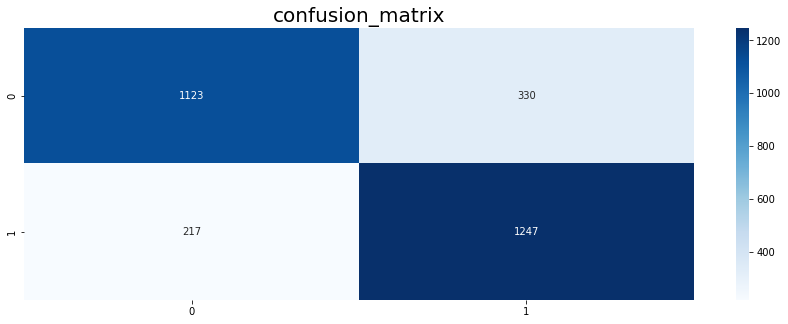

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(cf,annot = True, fmt='g',cmap='Blues')
plt.title('confusion_matrix',Fontsize=20)

In Above Confusion Matrix we can see that **1123 are true Negative** that means the will not have a stroke disease (actual and predicted) and **330 are false Positive** that means they have a stroke disease in actual but after using this technique they will not have a stroke disease and we can see that** 1247 are true Positive** that means the will have Stroke disease (Actual and Predicted) and **217 are False Negative** thats means they are not stroke disease in actual but after using the this technique they will Have a stroke disease

# **Model Comparision**

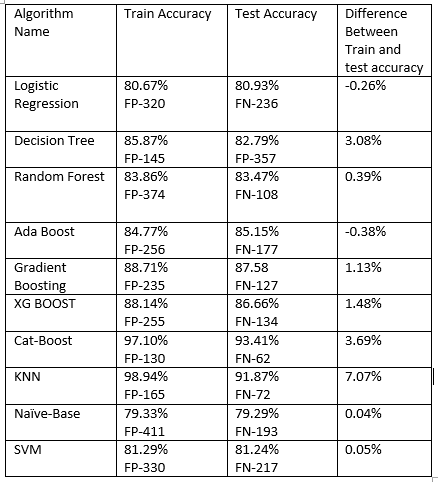

Among all the model considered **Cat Boost ,Gradient Boosting, XG Boost, Random Forest,Decision Tree** were able to obtain high accuracy score of the **5 as expected Cat Boost gave the highest accuracy score** on the other hand other Algorithm like Logistic Regression,SVM,KNN,NaiveBase didnt provide any better score as compared to other Classifier like Cat-Boost,Gradient Boosting etc.

Comparing the difference between accuracy score for Cat-Boost and Gradeint Boosting  it can be clearly observed that the Ensemble technique perform well compared to other Algorithm, moreover on the basis of Confusion Matrix of Cat-Boost and Gradient-Boosting the FP and FN is less in Cat-Boost as Compared to Gradient-Boosting

other Algorithm does not Perform well as compared to Ensemble Technique because because it does not good in treatment of outliers and Ensemble techniques is better to treat outlier compared to all algorithm thats why it performing well  and its not prone to overfitting  